# imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# Creating dataset

In [2]:
heart_data= {
    "Age": [29, 54, 37, 45, 63, 50, 48, 40, 58, 42, 55, 47, 35, 62, 53],
    "Cholesterol": [200, 230, 180, 195, 240, 210, 190, 220, 210, 205, 250, 215, 185, 245, 225],
    "Max_Heart_Rate": [150, 120, 165, 140, 110, 155, 145, 135, 125, 145, 115, 130, 160, 118, 135],
    "Exercise_Induced_Angina": [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0],
    "Heart_Disease": [1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],  # Balanced target variable
}
df=pd.DataFrame(heart_data)

# Splitting

In [3]:
y=df['Heart_Disease']
x=df.drop(columns=['Heart_Disease'])

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Normalisation

In [5]:
mms=MinMaxScaler()

In [6]:
x_train=pd.DataFrame(mms.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(mms.transform(x_test),columns=x_test.columns)

# Training

In [7]:
model=RandomForestClassifier(n_estimators=100,random_state=42)

In [8]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

# Evaluation

In [9]:
y_pred=model.predict(x_test)

In [10]:
score=accuracy_score(y_test,y_pred)
score

0.3333333333333333

In [12]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 1],
       [1, 0]])

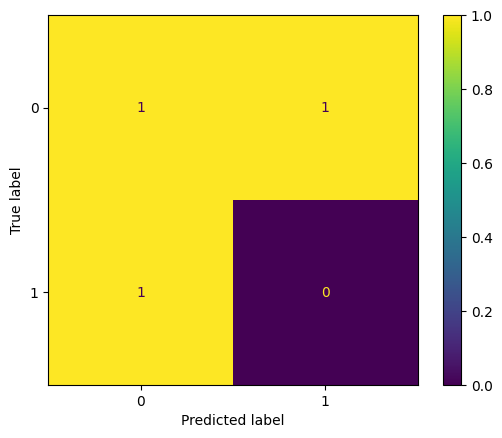

In [13]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()